# Project 1, Part 2, Executive Questions: Customer Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: John (Jack) Galvin

Year: 2022

Semester: Spring

Section: 9


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Function to run a select query and return rows in a pandas dataframe
# Pandas puts all numeric values from postgres to float
# If it will fit in an integer, change it to integer


def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
# Connect to Postgres

connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
# Create a cursor for the connection

cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.


# 1.2.1 Total Number of Customers for all of AGM

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as total_customers
from customers

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_customers
0,31082


# 1.2.2 Total Number of Customers by Store

Sort by store name in alphabetical order

In [17]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store
order by store
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_customers
0,Berkeley,8138
1,Dallas,6359
2,Miami,5725
3,Nashville,3646
4,Seattle,7214


# 1.2.3 Total Number of Customers by Distance from Store

Sort by shortest distance first

In [19]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        cu.distance as distance,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store, distance
order by distance
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,distance,total_customers
0,Seattle,1,593
1,Dallas,1,583
2,Nashville,1,175
3,Miami,1,648
4,Berkeley,1,791
...,...,...,...
116,Nashville,25,25
117,Miami,25,1
118,Berkeley,25,29
119,Seattle,25,31


# 1.2.4 List of Customers who have signed up but not bought anything

Sort by customer last name, then first name

In [25]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cu.first_name,
        cu.last_name
from customers as cu
    left join sales as sa
        on cu.customer_id = sa.customer_id
where sa.customer_id is null
order by cu.last_name, cu.first_name 
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,first_name,last_name
0,Tracy,Agott
1,Daniella,Arnke
2,Hyacintha,Assandri
3,Felice,Borman
4,Domini,Breit
5,Jacenta,Butterick
6,Marysa,Camillo
7,Lilas,Dukelow
8,Corinna,Dukesbury
9,Lorianna,Ellaway


# 1.2.5 What is the percentage of customers per population at the zip code level?

Sort by highest percentage first

In [26]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cu.zip,
        zc.population as pop,
        count(cu.customer_id) as total_customers,
        (count(cu.customer_id) / zc.population * 100) as pct_total
from customers as cu
    join zip_codes as zc
        on cu.zip = zc.zip
group by cu.zip, pop
order by pct_total desc
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,zip,pop,total_customers,pct_total
0,98164,155,2,1.290323
1,98050,552,6,1.086957
2,33109,475,5,1.052632
3,94613,861,9,1.045296
4,37240,778,8,1.028278
...,...,...,...,...
545,33033,58224,1,0.001718
546,75067,67487,1,0.001482
547,75035,69802,1,0.001433
548,94565,96081,1,0.001041


# 1.2.6 What is the percentage of customers per population at the city level?

Sort by highest percentage first

In [27]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select ci.city as city,
        ci.state as state,
        ci.population as pop,
        count(cu.customer_id) as total_customers,
        (count(cu.customer_id) / ci.population * 100) as pct_total
from cities as ci
    join customers as cu
        on ci.city = cu.city and ci.state = cu.state
group by ci.city, ci.state
order by pct_total desc
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,city,state,pop,total_customers,pct_total
0,Preston,WA,552,6,1.086957
1,Indianola,WA,1363,14,1.027146
2,Stinson Beach,CA,689,7,1.015965
3,Medina,WA,3260,33,1.012270
4,Suquamish,WA,3071,31,1.009443
...,...,...,...,...,...
193,Murfreesboro,TN,186354,4,0.002146
194,Wylie,TX,56764,1,0.001762
195,Pleasanton,CA,82226,1,0.001216
196,Frisco,TX,172448,2,0.001160


# 1.2.7 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

In [28]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        cu.distance as distance,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store, distance
order by distance
        
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,store,distance,total_customers
0,Seattle,1,593
1,Dallas,1,583
2,Nashville,1,175
3,Miami,1,648
4,Berkeley,1,791
...,...,...,...
116,Nashville,25,25
117,Miami,25,1
118,Berkeley,25,29
119,Seattle,25,31


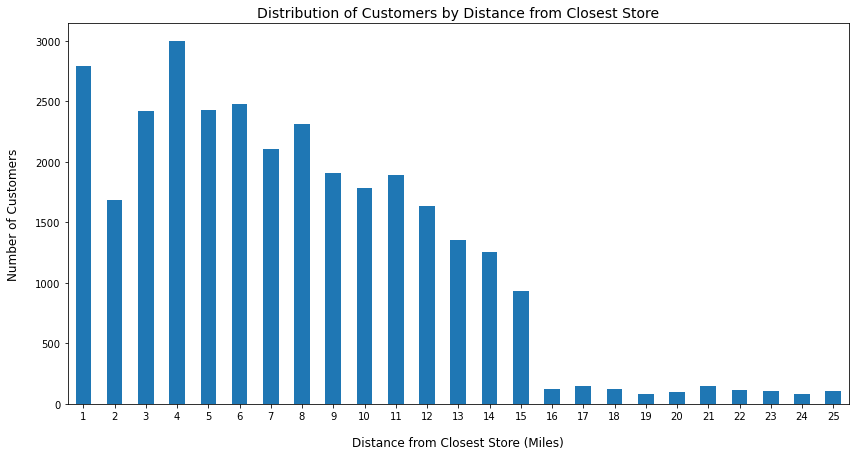

In [29]:
# Plot the results of the above query
fig, ax = plt.subplots()
df.groupby("distance")["total_customers"].sum().plot(kind="bar", figsize=(14,7))

# Add titles and axes labels
plt.title("Distribution of Customers by Distance from Closest Store", fontsize=14)
ax.set_ylabel("Number of Customers", labelpad=15, fontsize=12)
ax.set_xlabel("Distance from Closest Store (Miles)", labelpad=15, fontsize=12)
plt.xticks(rotation=0);